In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
def get_clf_eval(y_test, pred=None, pred_prob=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_prob)
    print('Confusion')
    print(confusion)
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('Recall : ', recall)
    print('F1 : ', f1)
    print('AUC : ', roc_auc)

def precision_recall_curve_plot(y_test=None, pred_prob_cls=None) :
    # Threshold ndarray and precision, and recall factor according to the threshold the extraction of ndarray
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob_cls)

    # Plot the X-axis with threshold values and the Y-axis with precision and reproducibility values respectively.
    # Display precision as dotted line
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # Change the scale of the threshold value X axis to 0.1 units
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x-axis, y-axis label and legend, and grid settings
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [18]:
# Performing learning and prediction with Logic Regression
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)[:, 1] # Probability of prediction by 1

get_clf_eval(y_test, pred, pred_prob)


Confusion
[[75 10]
 [27 42]]
Accuracy :  0.7597402597402597
Precision :  0.8076923076923077
Recall :  0.6086956521739131
F1 :  0.6942148760330579
AUC :  0.870076726342711


d:\intellij_data\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


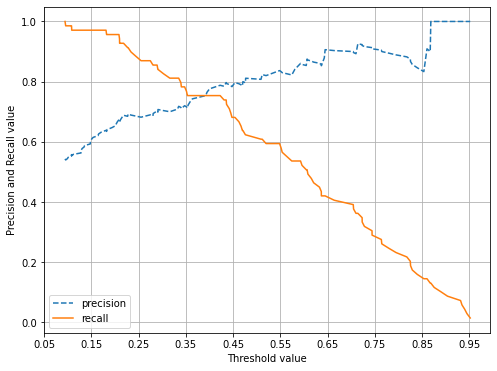

In [19]:
# Precision recall curve plot
pred_prob_cls = clf.predict_proba(x_test)[:, 1] # Probability of prediction by 1
precision_recall_curve_plot(y_test, pred_prob_cls)

In [20]:
# Check the value quartile distribution of each feature
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

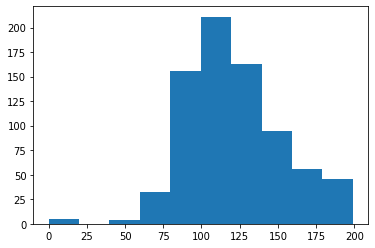

In [21]:
# Distribution plot of 'Glucose' features

plt.hist(diabetes_data['Glucose'], bins=10)

In [31]:
# Calculate the number and percentage of data of zero values
# from features with zero values

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in zero_features :
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    total_count = diabetes_data[feature].count()
    print('%s count : ' %feature, zero_count)
    print('%s percentage : %.4f %%' % (feature, 100*zero_count/total_count ))

Glucose count :  5
Glucose percentage : 0.6510 %
BloodPressure count :  35
BloodPressure percentage : 4.5573 %
SkinThickness count :  227
SkinThickness percentage : 29.5573 %
Insulin count :  374
Insulin percentage : 48.6979 %
BMI count :  11
BMI percentage : 1.4323 %


In [32]:
# Replace 0 with the average value
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,diabetes_data[zero_features].mean())

In [38]:
# Use StandardScaler class to apply batch scaling to feature datasets and learn/forecast
# with datasets that replace zero values with average values

x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)[:, 1] # Probability of prediction by 1

get_clf_eval(y_test, pred, pred_prob)

Confusion
[[95  7]
 [20 32]]
Accuracy :  0.8246753246753247
Precision :  0.8205128205128205
Recall :  0.6153846153846154
F1 :  0.7032967032967034
AUC :  0.8697209653092006


d:\intellij_data\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# Measure performance while changing the classification decision threshold

def get_eval_by_threshold(y_test, pred_prob, thresholds) :
    # Thresholds performing Evaluation by specifying the values within the list object in turn
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold)
        custom_pred = binarizer.transform(pred_prob)
        print('Threshold : ', custom_threshold)
        get_clf_eval(y_test, custom_pred, pred_prob)

In [44]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_prob = clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_prob[:, 1].reshape(-1, 1), thresholds)

Threshold :  0.3
Confusion
[[69 33]
 [10 42]]
Accuracy :  0.7207792207792207
Precision :  0.56
Recall :  0.8076923076923077
F1 :  0.6614173228346457
AUC :  0.8697209653092006
Threshold :  0.33
Confusion
[[71 31]
 [10 42]]
Accuracy :  0.7337662337662337
Precision :  0.5753424657534246
Recall :  0.8076923076923077
F1 :  0.672
AUC :  0.8697209653092006
Threshold :  0.36
Confusion
[[74 28]
 [11 41]]
Accuracy :  0.7467532467532467
Precision :  0.5942028985507246
Recall :  0.7884615384615384
F1 :  0.6776859504132232
AUC :  0.8697209653092006
Threshold :  0.39
Confusion
[[80 22]
 [14 38]]
Accuracy :  0.7662337662337663
Precision :  0.6333333333333333
Recall :  0.7307692307692307
F1 :  0.6785714285714285
AUC :  0.8697209653092006
Threshold :  0.42
Confusion
[[87 15]
 [18 34]]
Accuracy :  0.7857142857142857
Precision :  0.6938775510204082
Recall :  0.6538461538461539
F1 :  0.6732673267326732
AUC :  0.8697209653092006
Threshold :  0.45
Confusion
[[90 12]
 [19 33]]
Accuracy :  0.7987012987012987


In [46]:
binarizer = Binarizer(threshold=0.5)

pred_th = binarizer.fit_transform(pred_prob[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th, pred_prob[:, 1])


Confusion
[[95  7]
 [20 32]]
Accuracy :  0.8246753246753247
Precision :  0.8205128205128205
Recall :  0.6153846153846154
F1 :  0.7032967032967034
AUC :  0.8697209653092006
